In [173]:
# Initialize Otter
import otter
grader = otter.Notebook("assignment02.ipynb")

## Assignment 2

### Do not change the code that has been provided to you. You can add code but do not change/remove any components provided by us.

In [174]:
import numpy as np
import pandas as pd

In [184]:
data = pd.read_csv('./data.csv')

# The head() function is used to get the first 5 rows.
data.head()
#data.count()
#print(data.to_string())
#print(data['Weight'])

,ID,Region,Shipment,Customer_care_calls,Rating,Cost,Priors,Product_importance,Gender,Discount,Weight,Shipment Delivered (1/0)
0,1,D,Flight,4,2.0,177,3,low,F,44.0,1233.0,1.0
1,2,F,Flight,4,5.0,216,2,low,M,59.0,3088.0,1.0
2,3,A,Flight,2,2.0,183,4,low,M,48.0,3374.0,1.0
3,4,B,Flight,3,3.0,176,4,medium,M,10.0,1177.0,1.0
4,5,C,Flight,2,2.0,184,3,medium,F,46.0,2484.0,1.0


**Question 1:** Write a function `data_preprocessing` that returns a preprocessed data based on the rules given below.<br>

### You need to clean the data to prepare it for the next steps: Follow the following steps.
<ul>
    <li>Shipment column can only have three types : {'Flight', 'Road', 'Ship'}. Any row that does not have the given shipment type, should be removed.</li>
    <li>The Rating column can have the following values : {1.0,2.0,3.0,4.0,5.0}. Any row that has a rating value other than the given values, should be replaced by the average value of the rating column</li>
    <li>The Weight column has numeric values. Any row that has a weight value other than a valid numeric value, should be replaced by the average value of the weight column</li>
    <li>The Discount column can have numeric values in the range (0 to 80). Any row that has a discount value other than a valid value, should be replaced by the average value of the discount column</li>
    <li>Any row that has the Shipment Delivered (1/0) value other than 1 or 0 should be removed.</li>
</ul>



In [185]:
def data_preprocessing(data):
    #1 Shipment column if data is not valid
    for x in data.index:  
        if ((data.loc[x, 'Shipment'] != 'Flight')
        and (data.loc[x, 'Shipment'] != 'Road') 
        and (data.loc[x, 'Shipment'] != 'Ship')):
            data.drop(x, inplace = True)
            data.reset_index
        
    #2 Rating column
    ratingMean = data['Rating'].mean()
    for x in data.index:
        if ((data.loc[x, 'Rating'] != 1.0)
        and (data.loc[x, 'Rating'] != 2.0)
        and (data.loc[x, 'Rating'] != 3.0)
        and (data.loc[x, 'Rating'] != 4.0)
        and (data.loc[x, 'Rating'] != 5.0)):
            data.loc[x, 'Rating'] = ratingMean
    
    #3 Check numeric
    weightMean = data['Weight'].mean()
    for x in data.index:
        if (data.loc[x, 'Weight'] > 0):
            pass
        else:
            data.loc[x, 'Weight'] = weightMean
    
    #4 Discount column
    discountMean = data['Discount'].mean()
    for x in data.index:
        if ((data.loc[x, 'Discount'] >= 0) or (data.loc[x, 'Discount'] <= 80)):
            pass
        else:
            data.loc[x, 'Discount'] = discountMean
    
    #5 Removed Shipment Delivered if it is not 1 or 0
    for x in data.index:  
        if ((data.loc[x, 'Shipment Delivered (1/0)'] != 0.0) 
        and (data.loc[x, 'Shipment Delivered (1/0)'] != 1.0)):
            data.drop(x, inplace = True)
            data.reset_index
    
    return data
data = data_preprocessing(data)

In [186]:
data.isnull().sum()

ID                          0
Region                      0
Shipment                    0
Customer_care_calls         0
Rating                      0
Cost                        0
Priors                      0
Product_importance          0
Gender                      0
Discount                    0
Weight                      0
Shipment Delivered (1/0)    0
dtype: int64

In [187]:
grader.check("q1")

q1 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 2:** Write a function `data_analysis_matplotlib` that displays plots based on the requirements given below.<br>

### Display plots based on the requirements given below.
<ul>
    <li>Display a plot that has two subplots, the first subplot should be a grouped bar chart between number of shipments delivered and Product_importance: groups(shipment delivered/ shipment not delivered), the second subplot should be a grouped bar chart between the number of shipments delivered and Region: groups(shipment delivered/ shipment not delivered) </li>
</ul>
The plot should look like this:<br>
<img src='plot.png' width = "800" height="400">
Note : You might have to find out the different categories and range of columns in the data to come up with a more effective visualization.


In [179]:
import matplotlib.pyplot as plt
import numpy as np

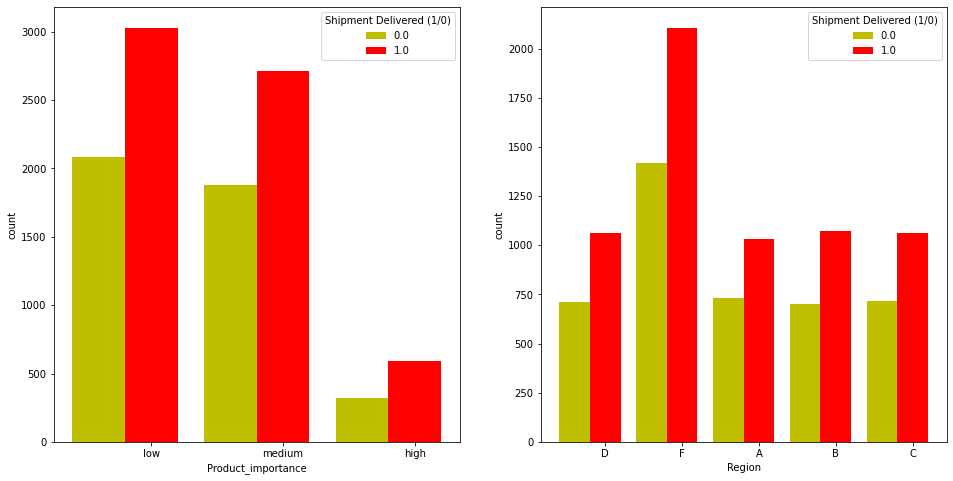

In [180]:
def data_analysis_matplotlib(data):
    plt.figure(figsize=(16,8))
    
    # My code starts here
    
    # Left subplot 
    lowBlue, mediumBlue, highBlue, lowOra, mediumOra, highOra = 0,0,0,0,0,0
    for x in data.index:
        if (data.loc[x, 'Shipment Delivered (1/0)'] == 0.0):
            if (data.loc[x, 'Product_importance'] == 'low'): lowBlue+=1
            elif (data.loc[x, 'Product_importance'] == 'medium'): mediumBlue+=1
            elif (data.loc[x, 'Product_importance'] == 'high'): highBlue+=1
        if (data.loc[x, 'Shipment Delivered (1/0)'] == 1.0):
            if (data.loc[x, 'Product_importance'] == 'low'): lowOra+=1
            elif (data.loc[x, 'Product_importance'] == 'medium'): mediumOra+=1
            elif (data.loc[x, 'Product_importance'] == 'high'): highOra+=1
    
    plt.subplot(1,2,1)
    name_list = ['low','medium','high']
    blue0 = [lowBlue,mediumBlue,highBlue]
    ora1 = [lowOra,mediumOra,highOra]
    x =list(range(len(blue0)))
    total_width, n = 0.8, 2
    width = total_width / n

    plt.bar(x, blue0, width=width, label='0.0',fc = 'y')
    for i in range(len(x)):
        x[i] = x[i] + width
    plt.bar(x, ora1, width=width, label='1.0',tick_label = name_list,fc = 'r')
    plt.xlabel('Product_importance')
    plt.ylabel('count')
    plt.legend(title='Shipment Delivered (1/0)')

    # Right subplot 

    dBlue,fBlue,aBlue,bBlue,cBlue = 0,0,0,0,0
    dOra,fOra,aOra,bOra,cOra = 0,0,0,0,0
    for x in data.index:
        if (data.loc[x, 'Shipment Delivered (1/0)'] == 0.0):
            if (data.loc[x, 'Region'] == 'D'): dBlue+=1
            elif (data.loc[x, 'Region'] == 'F'): fBlue+=1
            elif (data.loc[x, 'Region'] == 'A'): aBlue+=1
            elif (data.loc[x, 'Region'] == 'B'): bBlue+=1
            elif (data.loc[x, 'Region'] == 'C'): cBlue+=1
        if (data.loc[x, 'Shipment Delivered (1/0)'] == 1.0):
            if (data.loc[x, 'Region'] == 'D'): dOra+=1
            elif (data.loc[x, 'Region'] == 'F'): fOra+=1
            elif (data.loc[x, 'Region'] == 'A'): aOra+=1
            elif (data.loc[x, 'Region'] == 'B'): bOra+=1
            elif (data.loc[x, 'Region'] == 'C'): cOra+=1
                
    plt.subplot(1,2,2)
    name_list1 = ['D','F','A','B','C']
    blue0Region = [dBlue, fBlue, aBlue, bBlue, cBlue]
    ora1Region = [dOra, fOra, aOra, bOra, cOra]
    x =list(range(len(blue0Region)))
    total_width, n = 0.8, 2
    width = total_width / n
    
    plt.bar(x, blue0Region, width=width, label='0.0',fc = 'y')
    for i in range(len(x)):
        x[i] = x[i] + width
    plt.bar(x, ora1Region, width=width, label='1.0',tick_label = name_list1,fc = 'r')
    plt.xlabel('Region')
    plt.ylabel('count')
    plt.legend(title='Shipment Delivered (1/0)')
    
    # My code ends here
    plt.show()
data_analysis_matplotlib(data)

<!-- END QUESTION -->

**Question 3:** Write a function `one_hot_encoding` that encodes feature vector according to details given below.<br>

### One-hot Encoding data for machine learning.
<ul>
    <li>We need to create a feature vector (X) and label vector (y) that we will use in our Machine Learning Model.</li>
    <li>In order to create a feature vector, we need to one-hot encode the categorical features - Region, Shipment, Product_importance, Gender</li>
</ul>


In [181]:
data.head()

,ID,Region,Shipment,Customer_care_calls,Rating,Cost,Priors,Product_importance,Gender,Discount,Weight,Shipment Delivered (1/0)
0,1,D,Flight,4,2.0,177,3,low,F,44.0,1233.0,1.0
1,2,F,Flight,4,5.0,216,2,low,M,59.0,3088.0,1.0
2,3,A,Flight,2,2.0,183,4,low,M,48.0,3374.0,1.0
3,4,B,Flight,3,3.0,176,4,medium,M,10.0,1177.0,1.0
4,5,C,Flight,2,2.0,184,3,medium,F,46.0,2484.0,1.0


In [211]:
def one_hot_encoding(data):
    data['Gender'] = data['Gender'].replace(to_replace = "F", value = "Female")
    data['Gender'] = data['Gender'].replace(to_replace = "M", value = "Male")
    
    categorical_feats = ['Region','Shipment','Product_importance','Gender']
    
    for x in categorical_feats:
        data=one_hot_encoder(data,x,list(set(data[x])))
        lengthOfInput = (list(set(data[x])))
        collection = np.zeros(data.index, lengthOfInput.index)
        copy = data[x]
        data = data.drop(x, axis = 1)
        for j in range(len(copy)):
            collection[j, lengthOfInput.index(copy[i])] = 1.0
        result = pd.concat([data, pd.DataFrame(collection, columns = lengthOfInput)], axis = 1)
        reConstructDataFrame(result)
    
    data=pd.DataFrame(data,columns=['ID',"Customer_care_calls","Rating", 
                                    "Cost","Priors","Discount","Weight",'Shipment Delivered (1/0)','A','B','C','D','F','Flight', 'Road','Ship', 
                                    'high','low','medium','Female','Male'])
    #list(one_hot_data.columns) == ['ID', 'Customer_care_calls', 'Rating', 'Cost', 'Priors', 'Discount', 'Weight', 'Shipment Delivered (1/0)', 'A', 'B', 'C', 'D', 'F', 'Flight', 'Road', 'Ship', 'high', 'low', 'medium', 'Female', 'Male']
    
    return data
one_hot_data = one_hot_encoding(data)
X = np.array(one_hot_data.drop('Shipment Delivered (1/0)', axis=1))
y = np.array(one_hot_data['Shipment Delivered (1/0)'])

KeyError: 'Gender'

In [212]:
grader.check("q3")

q3 results:
    q3 - 1 result:
        Trying:
            X.shape == (10618, 20)
        Expecting:
            True
        **********************************************************************
        Line 1, in q3 0
        Failed example:
            X.shape == (10618, 20)
        Expected:
            True
        Got:
            False

    q3 - 2 result:
        Test case passed!

    q3 - 3 result:
        Trying:
            arr = np.array([1.000e+00, 4.000e+00, 2.000e+00, 1.770e+02, 3.000e+00, 4.400e+01, 1.233e+03,0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00])
        Expecting nothing
        ok
        Trying:
            base = X[0],
        Expecting nothing
        ok
        Trying:
            sum(sum(np.equal(arr,base))) == 20
        Expecting:
            True
        **********************************************************************
        Line 3, in q3 2
        Failed example:
            sum(sum(np.equal(arr,base))) == 20
        Exception raised:
            Traceback (most recent call last):
              File "/opt/conda/lib/python3.9/doctest.py", line 1336, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest q3 2[2]>", line 1, in <module>
                sum(sum(np.equal(arr,base))) == 20
            ValueError: operands could not be broadcast together with shapes (20,) (1,11)

In [213]:
import json
data={}
data['X_train']=X[:9000].tolist()
data['y_train']=y[:9000].tolist()
data['X_test']=X[9000:].tolist()
data['y_test']=y[9000:].tolist()

In [214]:
with open("data.json", "w") as outfile:
    json.dump(data, outfile)

In [215]:
'''
If you get the error: ModuleNotFoundError: No module named 'sklearn',
uncomment the line below and run this cell, then restart the notebook and run all cells again
'''
# !pip install scikit-learn

"\nIf you get the error: ModuleNotFoundError: No module named 'sklearn',\nuncomment the line below and run this cell, then restart the notebook and run all cells again\n"

**Question 4:**<br>

### Run the machine learning model in model.py
<ul>
    <li>You have been provided a model.py file along with this notebook.</li>
    <li>There are two calls stated below, one for training and other for testing. Both calls differ in the system arguements that are passed to the main function. </li>
<li>If -train is passed as a system argument, then you need to run_model function as run_model("data.json",train = True) 
    </li>
<li>If -test is passed as a system argument, then you need to run_model function as run_model("data.json",train = False) 
    </li>
</ul>


In [196]:
!python model.py -train

  File "/home/xul027/model.py", line 35
    
    ^
IndentationError: expected an indented block


In [197]:
!python model.py -test

  File "/home/xul027/model.py", line 35
    
    ^
IndentationError: expected an indented block


In [198]:
import json
with open("output_train.json", "r") as outfile:
    output_train=json.load(outfile)
with open("output_test.json", "r") as outfile:
    output_test=json.load(outfile)

In [199]:
grader.check("q4")

q4 results:
    q4 - 1 result:
        Trying:
            output_train['training_accuracy'] == 1.0
        Expecting:
            True
        **********************************************************************
        Line 1, in q4 0
        Failed example:
            output_train['training_accuracy'] == 1.0
        Exception raised:
            Traceback (most recent call last):
              File "/opt/conda/lib/python3.9/doctest.py", line 1336, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest q4 0[0]>", line 1, in <module>
                output_train['training_accuracy'] == 1.0
            KeyError: 'training_accuracy'

    q4 - 2 result:
        Trying:
            output_test['training_accuracy'] == 1.0 and round(output_test['testing_accuracy'],2) == 0.54
        Expecting:
            True
        **********************************************************************
        Line 1, in q4 1
        Failed example:
            output_test['training_accuracy'] == 1.0 and round(output_test['testing_accuracy'],2) == 0.54
        Exception raised:
            Traceback (most recent call last):
              File "/opt/conda/lib/python3.9/doctest.py", line 1336, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest q4 1[0]>", line 1, in <module>
                output_test['training_accuracy'] == 1.0 and round(output_test['testing_accuracy'],2) == 0.54
            KeyError: 'training_accuracy'

**Question 5:**<br>

### Regex
<ul>
    <li>Complete the functions given below to provide regex functionality</li>
</ul>


In [ ]:
import re
def regex1(string):
    '''
    Given an IP number as a string remove all leading zeros in the IP address
    Ex: regex1("123.01.09.103") = '123.1.9.103'
    
    '''
    newIp = re.sub(r'\b0+(\d)', r'\1', string)
    return newIp
regex1("123.01.09.103")

In [ ]:
def regex2(string):
    '''
    Given an email return True if the email is valid, else return False
    regex2('john.doe-gmail.com') = False
    '''
    emailRegex = r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b'
    if(re.fullmatch(emailRegex, string)):
        return True
    return False
regex2('john.doe-gmail.com')

In [ ]:
grader.check("q5")

### Submission Guidelines: 
#### 1. Save and run all the cells of this notebook.
#### 2. All the assignments in this course will have two types of test cases, local test cases and hidden test cases. You will be able to test your work on local test cases by running the cell  with - grader.check_all() or grader.check("question number")
#### 3. Once you are happy with the output of grader.check_all(), you should save the following files in a zip to gradescope:  assignment02.ipynb, model.py, output_train.json, output_test.json, data.csv
#### 4. You will be able to see the result of your work on hidden tests once the grades are released for a given assignment.

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [ ]:
grader.check_all()